I have simulated $100\,000$ games with four `RandomBot` players to generate a dataset.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
logs = pd.read_csv("game_logs/GameLogs.csv")
logs.head()

,game_id,round_id,action_type,active_player,bet_type,camel,camel_c_0_location,camel_c_0_stack_location,camel_c_1_location,camel_c_1_stack_location,...,player_1_trap_location,player_1_trap_type,player_2_coins,player_2_trap_location,player_2_trap_type,player_3_coins,player_3_trap_location,player_3_trap_type,trap_location,trap_type
0,0,0,NaN,NaN,NaN,NaN,2,2,2,0,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
1,0,1,move_trap,0.0,NaN,NaN,2,2,2,0,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,3.0,1.0
2,0,2,game_bet,1.0,win,c_0,2,2,2,0,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
3,0,3,move_camel,2.0,NaN,c_1,5,2,5,0,...,NaN,NaN,3,NaN,NaN,2,NaN,NaN,NaN,NaN
4,0,4,round_winner_bet,3.0,NaN,c_0,5,2,5,0,...,NaN,NaN,3,NaN,NaN,2,NaN,NaN,NaN,NaN


I'm interested in only the first and last entry of each game, i.e the starting and ending positions of the camels, respectively.

In [7]:
game_starts = logs.sort_values(["game_id", "round_id"]).groupby("game_id").nth(0)
game_ends = logs.sort_values(["game_id", "round_id"]).groupby("game_id").nth(-1)

In [8]:
game_starts.head()

,round_id,action_type,active_player,bet_type,camel,camel_c_0_location,camel_c_0_stack_location,camel_c_1_location,camel_c_1_stack_location,camel_c_2_location,...,player_1_trap_location,player_1_trap_type,player_2_coins,player_2_trap_location,player_2_trap_type,player_3_coins,player_3_trap_location,player_3_trap_type,trap_location,trap_type
game_id,,,,,,,,,,,,,,,,,,,,,
0,0,NaN,NaN,NaN,NaN,2,2,2,0,1,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,2,0,0,0,1,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,1,2,1,1,2,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,2,1,1,1,1,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,1,0,0,0,2,...,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN


In [9]:
game_ends.head()

,round_id,action_type,active_player,bet_type,camel,camel_c_0_location,camel_c_0_stack_location,camel_c_1_location,camel_c_1_stack_location,camel_c_2_location,...,player_1_trap_location,player_1_trap_type,player_2_coins,player_2_trap_location,player_2_trap_type,player_3_coins,player_3_trap_location,player_3_trap_type,trap_location,trap_type
game_id,,,,,,,,,,,,,,,,,,,,,
0,71,move_camel,2.0,NaN,c_2,13,0,9,0,16,...,1.0,1.0,5,14.0,-1.0,20,12.0,-1.0,NaN,NaN
1,89,move_camel,0.0,NaN,c_3,13,0,10,0,13,...,2.0,1.0,22,5.0,-1.0,18,11.0,-1.0,NaN,NaN
2,73,move_camel,0.0,NaN,c_1,11,1,16,0,8,...,2.0,-1.0,18,6.0,1.0,4,12.0,-1.0,NaN,NaN
3,83,move_camel,2.0,NaN,c_1,13,1,17,0,17,...,2.0,-1.0,13,12.0,1.0,11,8.0,-1.0,NaN,NaN
4,92,move_camel,3.0,NaN,c_4,6,0,13,0,12,...,3.0,-1.0,2,5.0,1.0,4,11.0,-1.0,NaN,NaN


Because camel positions consist of both track and stack positions, I will create a new value for the camel position, defined as:

$$ P = 10 \cdot pos_{track} + pos_{stack} $$

This ensures that camels stacked on top of each other will be treated accordingly.

In [10]:
def get_camel_pos(camel_id, dat):
    track_loc = "camel_" + camel_id + "_location"
    stack_loc = "camel_" + camel_id + "_stack_location"
    return dat[track_loc] * 10 + dat[stack_loc] 

In [11]:
start_positions = pd.DataFrame({
    camel_id: get_camel_pos(camel_id, game_starts) for
    camel_id in ["c_1", "c_2", "c_3", "c_4"]})

end_positions = pd.DataFrame({
    camel_id: get_camel_pos(camel_id, game_ends) for
    camel_id in ["c_1", "c_2", "c_3", "c_4"]})

In [12]:
start_positions.head()

,c_1,c_2,c_3,c_4
game_id,,,,
0,20,10,21,23
1,0,10,11,21
2,11,20,10,13
3,11,10,0,20
4,0,20,2,1


In [13]:
end_positions.head()

,c_1,c_2,c_3,c_4
game_id,,,,
0,90,160,131,132
1,100,131,160,161
2,160,80,130,110
3,170,171,70,130
4,130,120,70,160


The camels' relative places for each game can be obtained with `numpy.argsort`. It needs to be called twice as `argsort` returns the indices with which an array would be sorted, e.g. the $3^{rd}$ value of `np.argsort(x)` indicates the $3^{rd}$ largest value in the original array $x$. Therefore, $np.argsort(np.argsort(x))$ describes the order of each of the values in the original array $x$. 

In [14]:
start_positions_index = start_positions.apply(lambda x: np.argsort(np.argsort(-x)) + 1, axis=1)
start_positions_index.head()

,c_1,c_2,c_3,c_4
game_id,,,,
0,3,4,2,1
1,4,3,2,1
2,3,1,4,2
3,2,3,4,1
4,4,1,2,3


In [15]:
end_positions_index = end_positions.apply(lambda x: np.argsort(np.argsort(-x)) + 1, axis=1)
end_positions_index.head()

,c_1,c_2,c_3,c_4
game_id,,,,
0,4,1,3,2
1,4,3,2,1
2,1,4,2,3
3,2,1,4,3
4,2,3,4,1


For each of the camels, I can now look at the co-occurrence of positions, i.e. how often does a camel start at position $i$ and end at position $j$?

Because all camels in this analysis are identical, their respective co-occurrence matrices can simply be added together.

In [16]:
def get_cooccurrence_matrix(camel_id):
    return pd.crosstab(
        index=start_positions_index[camel_id].values, 
        columns=end_positions_index[camel_id].values)

camel_pos = get_cooccurrence_matrix("c_1") + \
    get_cooccurrence_matrix("c_2") + \
    get_cooccurrence_matrix("c_3") + \
    get_cooccurrence_matrix("c_4")

camel_pos.columns.name = "End"
camel_pos.index.name = "Start"

The result is the following heatmap. Camels that begin in first place have a tendency to 

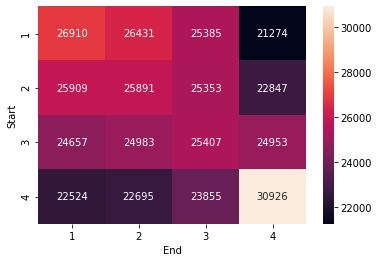

In [17]:
sns.heatmap(camel_pos, annot=True, fmt="d");